한국 데이터를 처리하고 분석하기 위해 폰트 설치

In [2]:
# 단계 1: 폰트 설치
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

!apt-get -qq -y install fonts-nanum > /dev/null
#fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

#font = fm.FontProperties(fname=fontpath, size=9)

#fm._rebuild()



fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설

In [ ]:
# 단계 2: 런타임 재시작
import os
os.kill(os.getpid(), 9)

In [1]:
# 단계 3: 한글 폰트 설정
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 마이너스 표시 문제
mpl.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설

In [2]:
%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

env: JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"


크롤링한 데이터의 날짜에 따라 계절을 부여

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
#봄여름가을겨울좀 붙여서 시즌별로 좀

# CSV 파일 읽어오기
df = pd.read_csv("melon_rank.csv")

# 연도와 월 정보를 이용하여 계절 정보 생성
# 3, 4, 5 : 봄 / 6, 7, 8 : 여름 / 9, 10, 11 : 가을 / 12, 1, 2 : 겨울
seasons = []
for i in range(len(df)):
    month = df.loc[i, 'month']
    if month in [3, 4, 5]:
        seasons.append('spring')
    elif month in [6, 7, 8]:
        seasons.append('summer')
    elif month in [9, 10, 11]:
        seasons.append('fall')
    else:
        seasons.append('winter')

# 계절 정보를 새로운 칼럼으로 추가
df['season'] = seasons

# 새로운 CSV 파일로 저장
df.to_csv("melon_rank_with_season.csv", index=False)
df = pd.read_csv("melon_rank_with_season.csv")
print(df)

      year  month  rank             title               singer  season
0     2023      1     1             Ditto             NewJeans  winter
1     2023      1     2               OMG             NewJeans  winter
2     2023      1     3          Hype Boy             NewJeans  winter
3     2023      1     4           사건의 지평선          윤하 (YOUNHA)  winter
4     2023      1     5       ANTIFRAGILE   LE SSERAFIM (르세라핌)  winter
...    ...    ...   ...               ...                  ...     ...
8295  2010     12    46         첫 이별 그날 밤                  아이유  winter
8296  2010     12    47  사랑합니다 (Feat. 부활)  엠씨더맥스 (M.C the MAX)  winter
8297  2010     12    48          느리게 하는 일                  아이유  winter
8298  2010     12    49              Mach                 레인보우  winter
8299  2010     12    50           Go Away                 2NE1  winter

[8300 rows x 6 columns]


5회 이상 순위에 들지못한 노래들은 데이터에서 제외, 순위에 들은 횟수를 따로 카운트하여 저장

In [6]:
# 5번 이상 랭크에 들어온 노래만 뽑기

# CSV 파일 읽어오기 (UTF-8 인코딩으로 지정)
df = pd.read_csv("melon_rank_with_season.csv", encoding='utf-8')

# 중복된 타이틀이 없는 경우 모두 삭제
df_unique = df.drop_duplicates(subset=['title'], keep=False)
# 각 타이틀의 중복 횟수 추출
title_duplicates = (
    df[df.duplicated(['title'], keep=False)]
    .groupby('title')
    .size()
    .reset_index(name='count')
    .query('count >= 5')
)
print(title_duplicates)
title_duplicates.to_csv("filtered_melon_rank.csv", index=False, encoding='utf-8')


                                                  title  count
6                                               12시 30분      5
10                                                 180도      6
11                                              19금BAND      8
12    19금BORN HATER (Feat. 빈지노, 버벌진트, B.I, MINO, BOBBY)      6
19            19금Peaches (Feat. Daniel Caesar & Giveon)      9
...                                                 ...    ...
1779                                     홀로 (Feat. 김나영)      5
1790             회전목마 (Feat. Zion.T, 원슈타인) (Prod. Slom)      9
1793                                                휘파람      8
1794                           흔들리는 꽃들 속에서 네 샴푸향이 느껴진거야     22
1801                                       힘든 건 사랑이 아니다      8

[447 rows x 2 columns]


순위에 여러번 등재된 상위 타이틀을 계절별로 나누어 다시 카운트하여 계절과 순위가 영향있는지 차트로

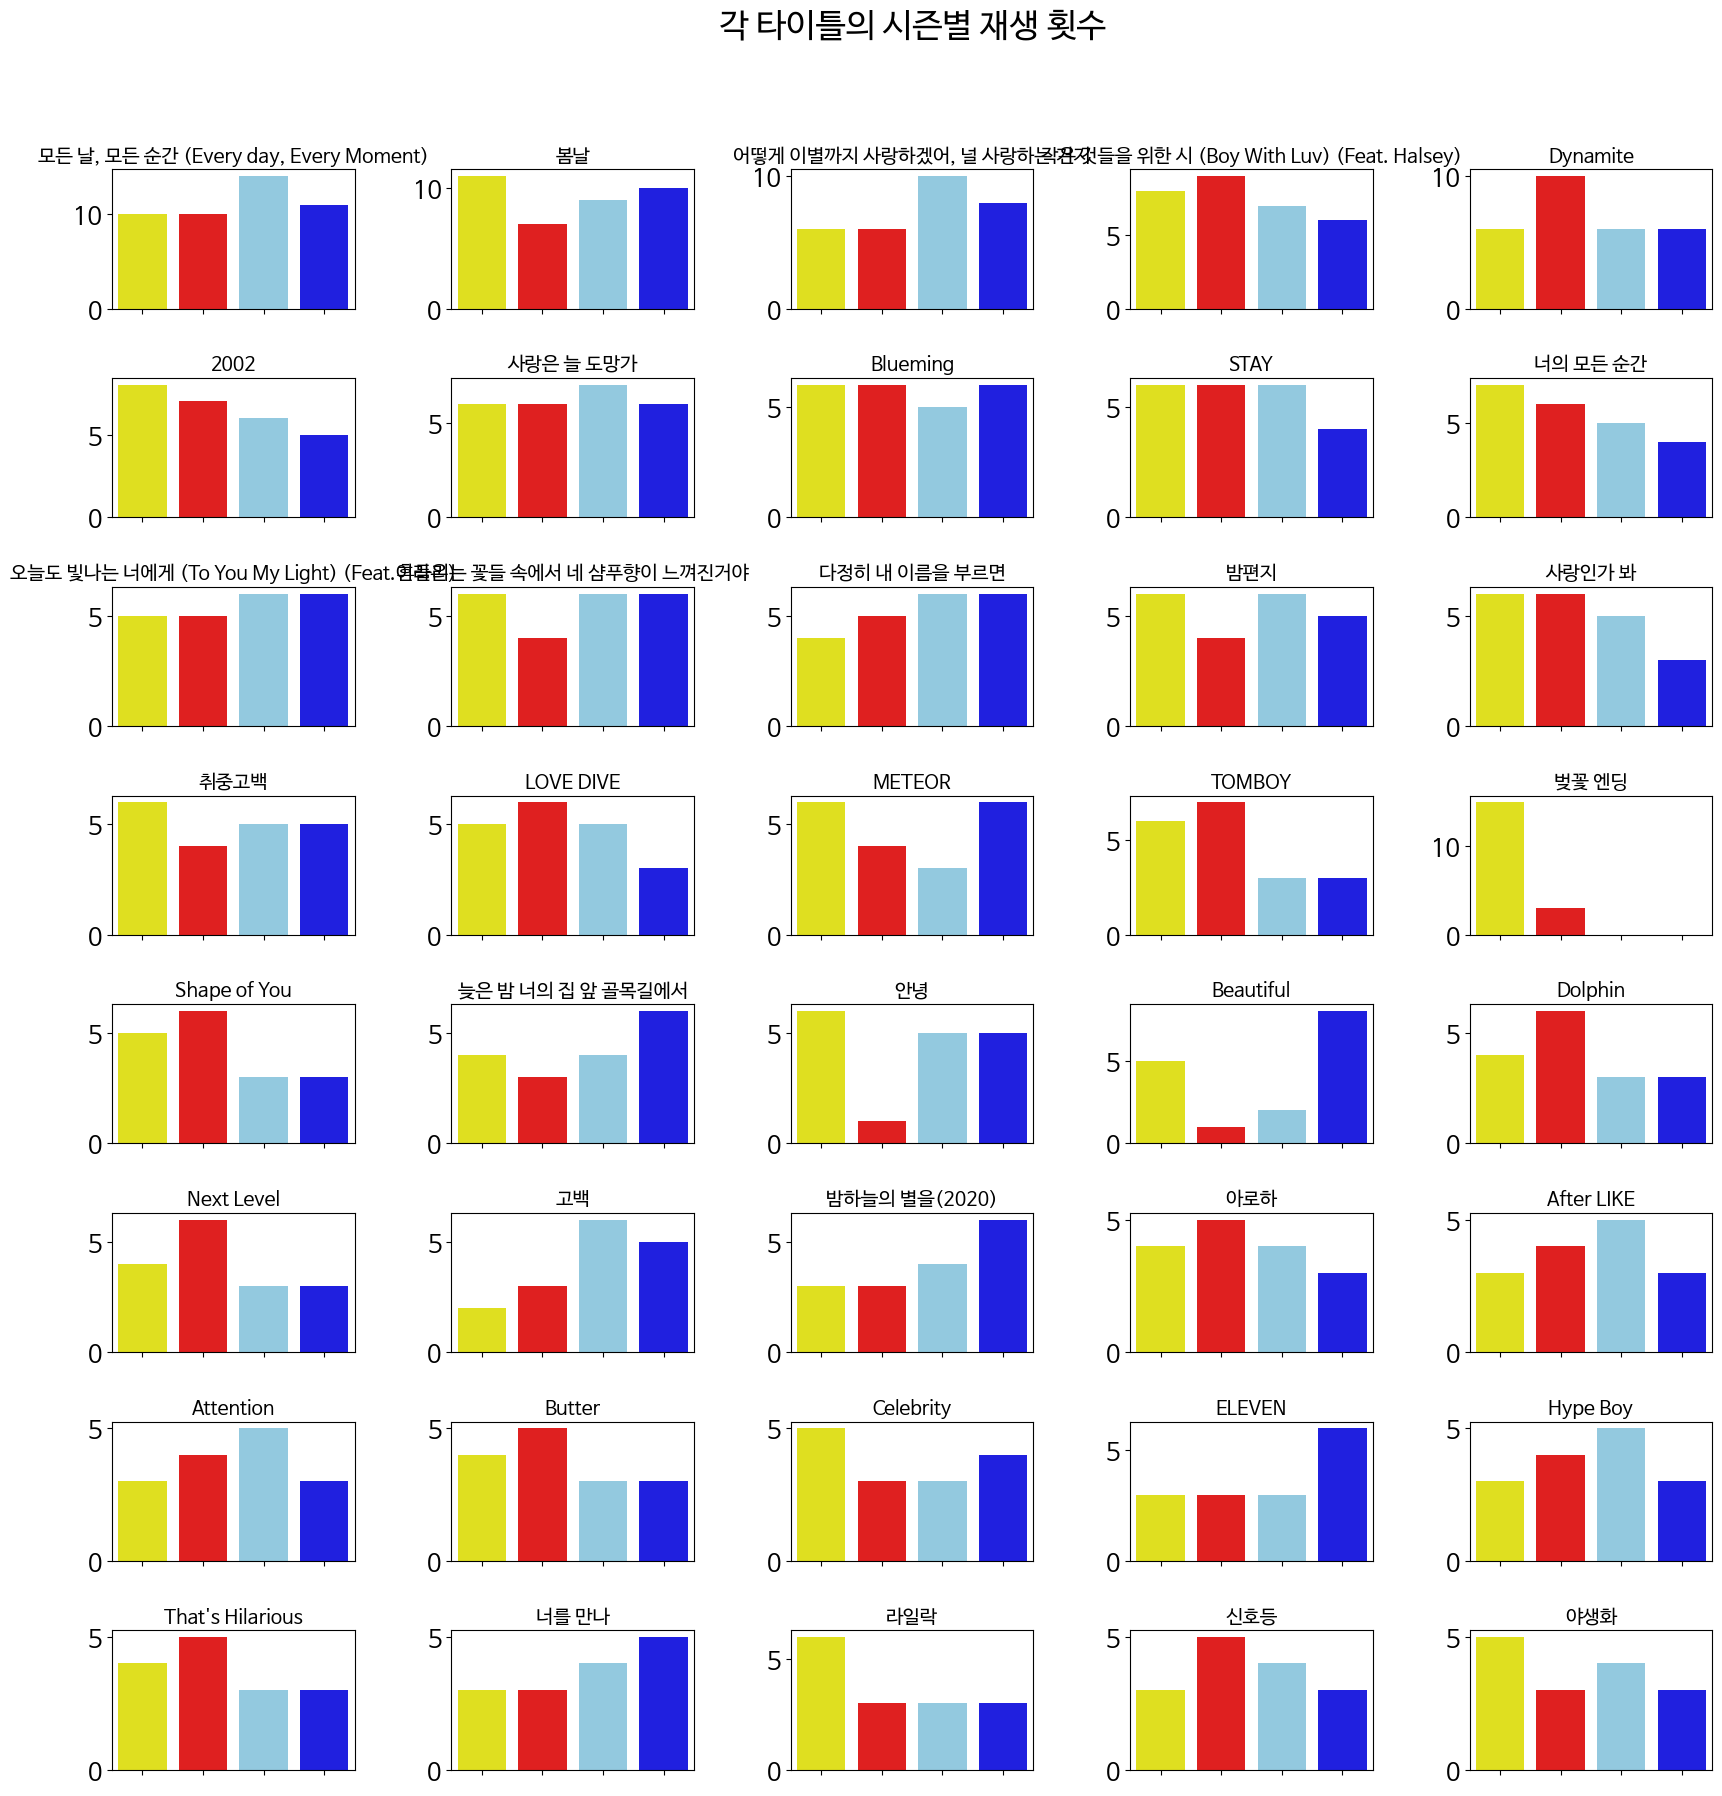

In [7]:

# "filtered_melon_rank.csv" 파일 읽어오기
filtered_df = pd.read_csv("filtered_melon_rank.csv", encoding='utf-8')

# 상위 40개의 타이틀 선택
top_titles = filtered_df.nlargest(40, 'count')['title']

# "melon_rank_with_season.csv" 파일 읽어오기
melon_with_season_df = pd.read_csv("melon_rank_with_season.csv", encoding='utf-8')

# subplot 생성 (8행 5열로 바꿈)
fig, axes = plt.subplots(nrows=8, ncols=5, figsize=(20, 20))
fig.suptitle('각 타이틀의 시즌별 재생 횟수', fontsize=24)

# 상위 40개 타이틀에 대한 그래프 그리기
for i, title in enumerate(top_titles):
    row = i // 5
    col = i % 5

    if row < 8:  # 추가된 부분 (8개의 행만 존재하도록)
        # 해당 타이틀에 대한 데이터 필터링
        title_data = melon_with_season_df[melon_with_season_df['title'] == title]

        # 시즌별 재생 횟수 카운트
        season_counts = title_data['season'].value_counts().reindex(['spring', 'summer', 'fall', 'winter'], fill_value=0)

        # 시즌별 재생 횟수 그래프 그리기 (dodge 옵션 사용)
        sns.barplot(x=season_counts.index, y=season_counts.values, ax=axes[row, col], dodge=True,
                    palette={'spring': 'yellow', 'summer': 'red', 'fall': 'skyblue', 'winter': 'blue'})
        axes[row, col].set_title(title, fontsize=14)
        axes[row, col].set_xlabel('')
        axes[row, col].set_xticklabels([])  # x축 레이블 숨김

# subplot 간의 간격 조절
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, hspace=0.5, wspace=0.4)

# 그래프를 파일로 저장하거나 화면에 출력할 수 있습니다.
plt.savefig('seasonal_play_counts.png')
plt.show()
